## Twitter US Airline Sentiment Analysis
**Author**: Aidos Utegulov<br />
**Cohort**: Feb 21

## Objective

Perform Sentiment Analysis/Classification on the dataset

### Data Dictionary

The dataset has the following columns:

* tweet_id                                                           
* airline_sentiment                                               
* airline_sentiment_confidence                               
* negativereason                                                   
* negativereason_confidence                                    
* airline                                                                    
* airline_sentiment_gold                                              
* name     
* negativereason_gold 
* retweet_count
* text
* tweet_coord
* tweet_created
* tweet_location 
* user_timezone

In [1]:
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aidos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aidos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aidos\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import pandas as pd
data=pd.read_csv('Tweets.csv')

### View the first and last 5 rows of the dataset.

In [3]:
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
data.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


### Understand the shape of the dataset.

In [5]:
data.shape

(14640, 15)

### Dataset description

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [8]:
data.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

**Observations**
- Dataset consists of 14640 rows and 15 columns
- most of column types are strings and there are only 4 numeric columns
- there are a lot of null values in various columns, luckily, the columns that we need for our analysis don't have null values

## EDA

### Plot the distribution of all tweets among each airline

In [9]:
print("Total number of tweets for each airline \n ",
      data.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


<AxesSubplot:ylabel='airline'>

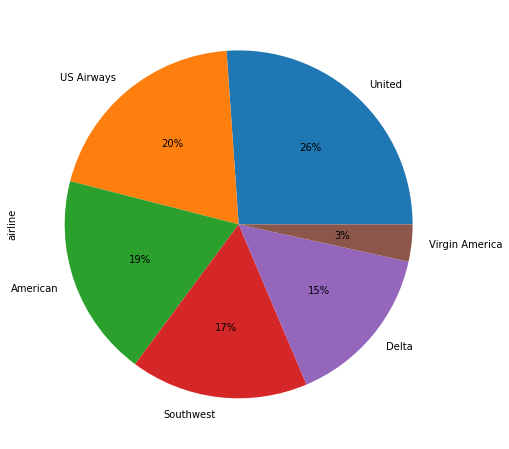

In [10]:
plt.figure(1,figsize=(10, 8))
data.airline.value_counts().plot(kind='pie', autopct='%1.0f%%')

**Observations**
- United has the lead having 26% of all tweets
- US Airways and American have almost equal distribution of tweets 20% and 19% respectively
- Southwest has 17% and Delta - 15%, only 3% of tweets are about Virgin America

### Plot the distribution of sentiment across all the tweets

C:\Users\Aidos\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

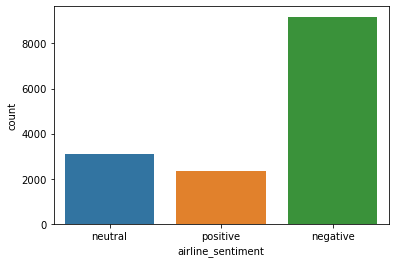

In [11]:
import seaborn as sns
sns.countplot(data['airline_sentiment'])

**Observations**
- Most of the tweets are negative
- There are slightly more neutral than positive sentiments

### Plot the distribution of Sentiment of tweets for each airline

In [12]:
airlines = data['airline'].unique().tolist()

In [13]:
print(airlines)

['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways', 'American']


In [14]:
sentiments = data['airline_sentiment'].unique().tolist()

In [15]:
print(sentiments)

['neutral', 'positive', 'negative']


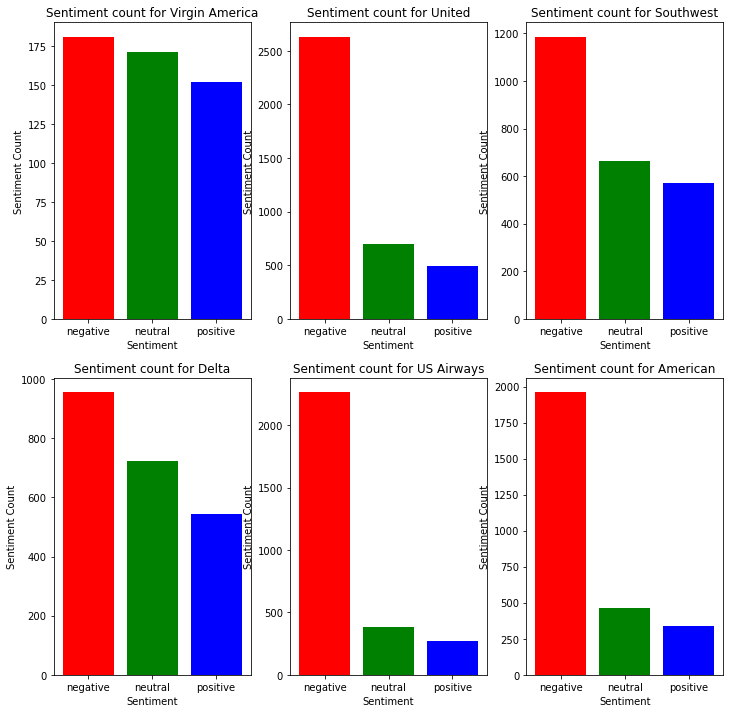

In [16]:
plt.figure(1,figsize=(12, 12))
for airline in airlines:
    indices = airlines.index(airline)
    plt.subplot(2, 3, indices+1)
    airline_data = data[data['airline'] == airline]
    count = airline_data['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index, count, color=['red', 'green', 'blue'])
    plt.xticks(Index, ['negative', 'neutral', 'positive'])
    plt.ylabel('Sentiment Count')
    plt.xlabel('Sentiment')
    plt.title('Sentiment count for ' + airline)

**Observations**
- Seems like each airline has mostly negative sentiments.
- Only Virgin America has more or less balanced count of all sentiments, but still, it's share of tweets is the least, only 3%

### Plot the distribution of all the negative reasons

<AxesSubplot:ylabel='negativereason'>

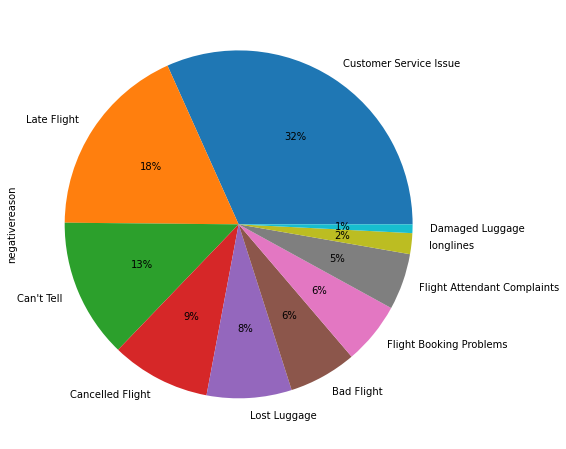

In [17]:
plt.figure(1,figsize=(10, 8))
data.negativereason.value_counts().plot(kind='pie', autopct='%1.0f%%')

**Observation**
- Most of the reasons (half of them, actually) for negative sentiment are due to Customer Service Issues and Late Flights
- A significant portion of people (13%) couldn't tell the reason
- Other reasons involve: Cancelled Flight (9%), Lost Luggage(8%), Bad Flight(6%), etc. 

### Plot the word cloud graph of tweets for positive and negative sentiment separately

In [18]:
df_pos = data[data['airline_sentiment'] == 'positive']

The following method was provided to us at a mentoring session

In [19]:
!pip install wordcloud

In [20]:
import wordcloud
def show_wordcloud(data, title):
    text = ' '.join(data['text'].astype(str).tolist())                 # Converting Summary column into list
    stopwords = set(wordcloud.STOPWORDS)                                  # instantiate the stopwords from wordcloud
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

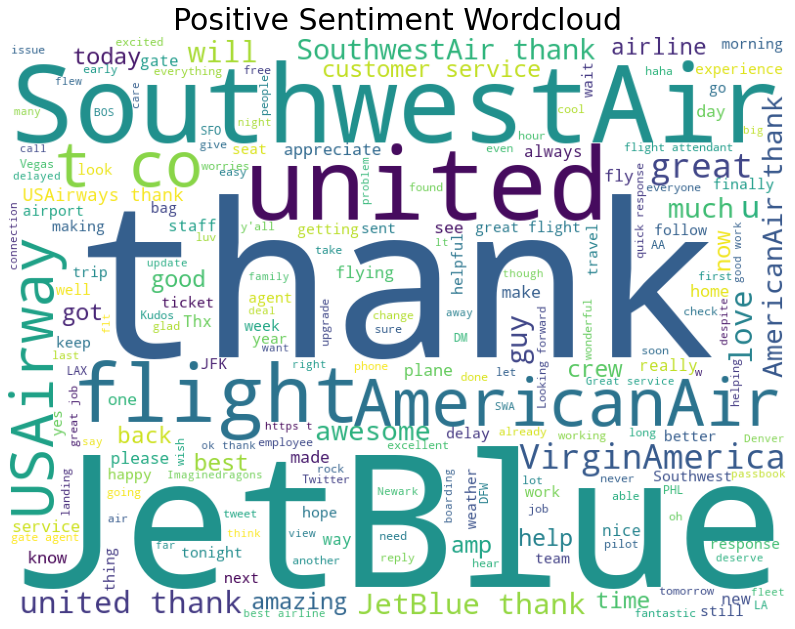

In [21]:
show_wordcloud(df_pos, 'Positive Sentiment Wordcloud')

In [22]:
df_neg = data[data['airline_sentiment'] == 'negative']

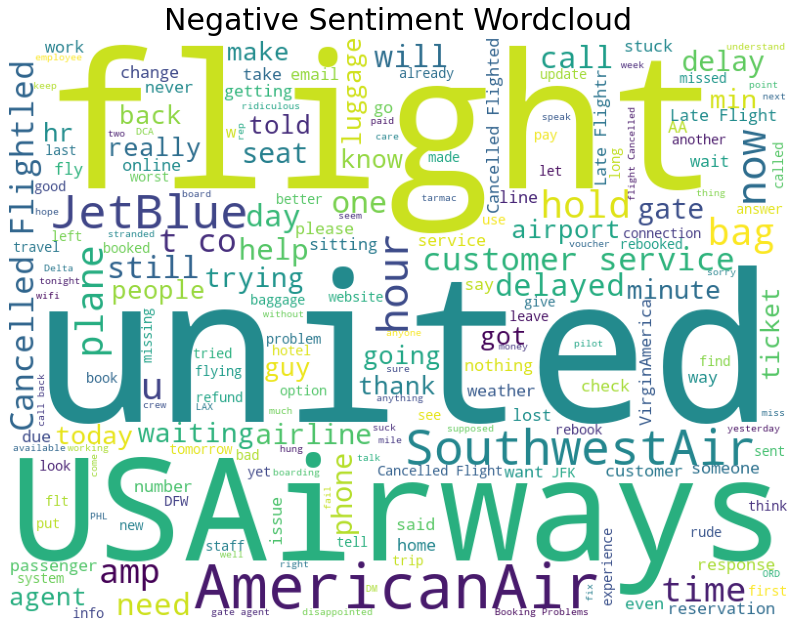

In [23]:
show_wordcloud(df_neg, 'Negative Sentiment Wordcloud')

**Observations**
- in positive sentiments you can see words like: 'great', 'good', 'thank', 'better', 'best', etc
- in negative sentiments the words like 'late', 'help', 'rude', 'fail', 'hold' are shown.

## Dropping unnecessary columns and checking shape of data

In [24]:
data = data[['text', 'airline_sentiment']]

In [25]:
data.shape

(14640, 2)

In [26]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


## Data preprocessing

### Html tag removal
- I'm going to use BeautifulSoup library for this task. First define a function to remove html tags and then apply it to each row of the dataset

In [27]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

In [28]:
data['text'] = data['text'].apply(lambda x: strip_html(x))

In [29]:
data['text'].head()

0                                                                                           @VirginAmerica What @dhepburn said.
1                                                      @VirginAmerica plus you've added commercials to the experience... tacky.
2                                                       @VirginAmerica I didn't today... Must mean I need to take another trip!
3    @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces & they have little recourse
4                                                                       @VirginAmerica and it's a really big bad thing about it
Name: text, dtype: object

### Removing contractions

Just by looking at the top 5 records you can already tell that we need to remove contractions before going further with preprocessing

In [30]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))

In [32]:
data['text'].head()

0                                                                                            @VirginAmerica What @dhepburn said.
1                                                     @VirginAmerica plus you have added commercials to the experience... tacky.
2                                                       @VirginAmerica I did not today... Must mean I need to take another trip!
3    @VirginAmerica it is really aggressive to blast obnoxious "entertainment" in your guests' faces & they have little recourse
4                                                                       @VirginAmerica and it is a really big bad thing about it
Name: text, dtype: object

### Tokenization
- Here I'll make use of the word_tokenize function from nltk library. Apply the inline function to the text column of the dataset, use word_tokenize on a row inside the inline lambda function

In [33]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) 

In [34]:
data['text'].head()

0                                                                                                              [@, VirginAmerica, What, @, dhepburn, said, .]
1                                                                 [@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]
2                                                                [@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]
3    [@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]
4                                                                                      [@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]
Name: text, dtype: object

### Remove the numbers
- Here I'll use a regular expression to match all the numbers in the array of words in each row of the column, and replace the matched expression with an empty string

In [35]:
def remove_numbers(text):
    no_digits = []
    for word in text: 
        new_word = re.sub(r'\d+', '', word)
        if new_word != '':
            no_digits.append(new_word)        
    return no_digits

In [36]:
data['text'] = data['text'].apply(lambda x: remove_numbers(x))

In [37]:
print(data['text'].head())

0                                                                                                              [@, VirginAmerica, What, @, dhepburn, said, .]
1                                                                 [@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]
2                                                                [@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]
3    [@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]
4                                                                                      [@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]
Name: text, dtype: object


### Removal of Special Characters and Punctuations
- Here I'll again use nltk library 

In [38]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [39]:
data['text'] = data['text'].apply(lambda x: remove_non_ascii(x))

In [40]:
data['text'].head()

0                                                                                                              [@, VirginAmerica, What, @, dhepburn, said, .]
1                                                                 [@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]
2                                                                [@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]
3    [@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]
4                                                                                      [@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]
Name: text, dtype: object

- looks like '@' is still there, because it's an ascii character, it will be gone once we remove punctuations too, next:

In [41]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

In [42]:
data['text'] = data['text'].apply(lambda x: remove_punctuation(x))

In [43]:
data['text'].head()

0                                                                                                      [VirginAmerica, What, dhepburn, said]
1                                                           [VirginAmerica, plus, you, have, added, commercials, to, the, experience, tacky]
2                                                          [VirginAmerica, I, did, not, today, Must, mean, I, need, to, take, another, trip]
3    [VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, entertainment, in, your, guests, faces, they, have, little, recourse]
4                                                                        [VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]
Name: text, dtype: object

**Observation**
- As expected the '@' sign is gone, since it matches the regular expression we used to get rid of the punctuations

### Removal of stopwords
- The stopwords are downloaded from nltk package, but we do need to retain some of them in order to preserve the overall meaning of the sentiments. So, I'll make a custom list of stopwords and subtract it from the original list. Then, in the method just check if the word is in the stopwords list, if it is, do not append it to the returned array.

In [44]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist)) 

In [45]:
print(stopwords)

['been', 'most', 'those', 'under', 'between', 'few', 'very', 'them', 'of', 'about', 'just', 'each', 'into', 'myself', 'himself', 'once', 'when', 'more', 'no', 'such', 'its', 'it', 'as', 'before', 'these', 'both', 'were', 'can', 'with', "aren't", 'but', 'that', "you've", 'than', 'your', "it's", 'does', 'again', 'where', 'while', 'ourselves', 'themselves', 'hers', 'up', 'so', 'which', 'had', 'o', 'who', 'her', 'couldn', 'do', 'because', 've', 'their', "should've", 'out', 'his', 'all', 'or', 'there', 'was', 'now', 'too', 're', 'ours', 'will', 'being', 'aren', "you're", 'from', 'have', 'm', 'against', 'off', 'here', 'our', 'the', 'they', 'over', 'ain', "you'd", 'this', 'some', 't', 'i', 'you', 'at', "don't", 'after', 'own', 'any', 'yourselves', 'below', 'down', 'until', 'he', 'to', "she's", 'for', 'then', 'other', 'are', 'yours', 's', 'did', 'how', 'above', 'y', 'don', 'him', 'is', 'during', 'having', 'she', 'an', 'through', "you'll", 'why', 'yourself', 'nor', 'theirs', "that'll", 'my', 'l

In [46]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

In [47]:
data['text'] = data['text'].apply(lambda x: remove_stopwords(x))

In [48]:
data['text'].head()

0                                                                    [VirginAmerica, What, dhepburn, said]
1                                             [VirginAmerica, plus, added, commercials, experience, tacky]
2                                 [VirginAmerica, I, not, today, Must, mean, I, need, take, another, trip]
3    [VirginAmerica, really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]
4                                                                 [VirginAmerica, really, big, bad, thing]
Name: text, dtype: object

### Conversion to lowercase
- This one's a no-brainer, simply iterate through words and convert them to lowercase using the standard method

In [49]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

In [50]:
data['text'] = data['text'].apply(lambda x: to_lowercase(x))

In [51]:
data['text'].head()

0                                                                    [virginamerica, what, dhepburn, said]
1                                             [virginamerica, plus, added, commercials, experience, tacky]
2                                 [virginamerica, i, not, today, must, mean, i, need, take, another, trip]
3    [virginamerica, really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]
4                                                                 [virginamerica, really, big, bad, thing]
Name: text, dtype: object

### Lemmatize or stemming
- I'm going to go with lemmatizing here, since stemming is usually done incorrect, and you get words that do not make sense sometimes. For this I will use the WordNetLemmatizer object

In [52]:
lemmatizer = WordNetLemmatizer()
def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

In [53]:
data['text'] = data['text'].apply(lambda x: lemmatize_list(x))

In [54]:
data['text'].head()

0                                                                    [virginamerica, what, dhepburn, say]
1                                              [virginamerica, plus, add, commercials, experience, tacky]
2                                [virginamerica, i, not, today, must, mean, i, need, take, another, trip]
3    [virginamerica, really, aggressive, blast, obnoxious, entertainment, guests, face, little, recourse]
4                                                                [virginamerica, really, big, bad, thing]
Name: text, dtype: object

### Join the words in the list to convert back to text string in the data frame

In [55]:
def join_words(words):
    return ' '.join(words)

In [56]:
data['text'] = data['text'].apply(lambda x: join_words(x))

In [57]:
data['text'].head()

0                                                              virginamerica what dhepburn say
1                                          virginamerica plus add commercials experience tacky
2                                 virginamerica i not today must mean i need take another trip
3    virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4                                                           virginamerica really big bad thing
Name: text, dtype: object

**Observations**
- Now we have finished the preprocessing stage and ideally, each row in the text column of the dataset contains clean words joined in a string, containing no numbers, punctuations, non-ascii characters and reduced to their basic stem form

## Vectorization

I will first use CountVectorizer for vectorization, limit the max features to 2000 for performance reasons (I tried not limiting it and set n_estimators to 200 in Random Forest - same result but took way longer) and then train and test a Random Forest classifier

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vec = CountVectorizer(max_features = 2000)
data_features = bow_vec.fit_transform(data['text'])
data_features = data_features.toarray()

In [79]:
data_features.shape

(14640, 2000)

In [92]:
labels = data['airline_sentiment']

In [93]:
labels.head()

0     neutral
1    positive
2     neutral
3    negative
4    negative
Name: airline_sentiment, dtype: object

In [94]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [95]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7240437158469946


**Observations**
- We only get 0.72 cross validation score, which, considering we limited the max_features to 2000 is not very bad.
- Let's see if we can improve the score

## Tuning the model

In [96]:
base_ln = [x for x in range(1, 25)]
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

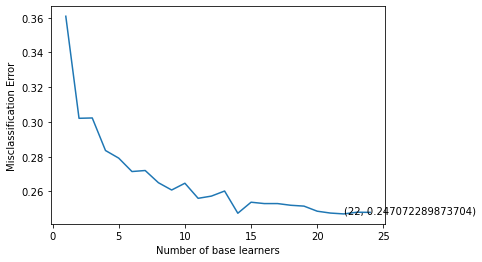

In [97]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [98]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.769808743169399

**Observations**
- We use k-fold cross validation to determine the optimal number of estimators (choose the range between 1 and 25) and we choose the one that gives the minimum error (around 22)
- Then we fit the model with n_estimators set to the optimal number of learners and we test. We get 77% accuracy on the test set, which is very good, in my opinion.

## Model Evaluation

In [99]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [100]:
result =  clf.predict(X_test) #save predictions

In [102]:
accuracy = accuracy_score(result, y_test)
print('Accuracy score: ', accuracy)

Accuracy score:  0.769808743169399


In [103]:
print(classification_report(result, y_test))

              precision    recall  f1-score   support

    negative       0.91      0.82      0.86      3123
     neutral       0.48      0.58      0.52       724
    positive       0.58      0.74      0.65       545

    accuracy                           0.77      4392
   macro avg       0.65      0.71      0.68      4392
weighted avg       0.80      0.77      0.78      4392



**Observations**
- We have very high scores for precision recall and f1 (0.91, 0.82, 0.86) when identifying negative sentiments (probably due to them being the highest in number)
- Low scores for neutral, in the range of 0.5 for all three scores, and moderate scores (precision 0.58, recall 0.74 and f1 - 0.65) for identifying positive sentiments

### Confusion matrix

<Figure size 432x288 with 0 Axes>

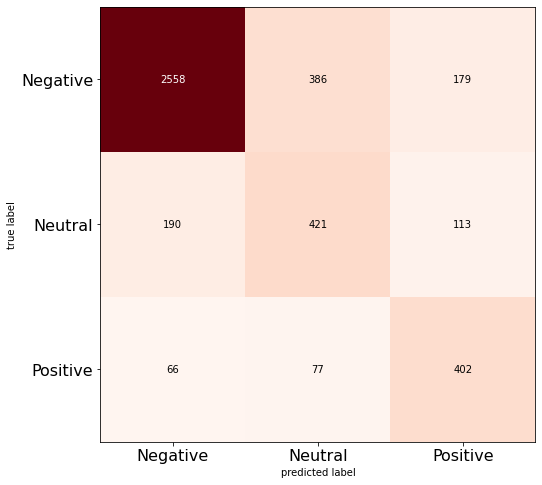

In [108]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(result, y_test)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

**Observations**
- We have a lot of sentiments (2558, also marked red) that we've classified as negative and they turned out to be negative
- The number of sentiments that were predicted as positive and neutral and were actually positive and neutral is almost equal (421 for neutral and 402 for positive) 
- There aren't a lot of misclassified sentiments in each category as we can see from the matrix, the highest number is 386 that our model predicted to be neutral, but they turned out to be negative. 
- Overall, I think the model did well with misclassification errors

### **Word Cloud of top 40 important features from the CountVectorizer + Random Forest based model**

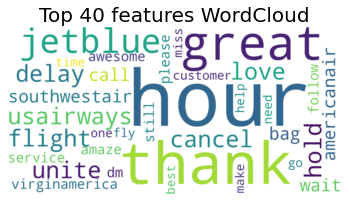

In [109]:
all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

**Observations**
- you can see words like great, hour, love, awesome, thank, best in there along with the words like delay and cancel and miss 

## Building a model using tf-idf vectorizer

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 2000)

In [112]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [113]:
forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.6897540983606558


**Observations**
- The tf-idf vectorizer is supposed to be more efficient, giving less weight to words that appear more often
- This time, however, the random forest classifier gives a lower cross validation score (0.68) than when we used with CountVectorizer

### Tuning the model

In [114]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

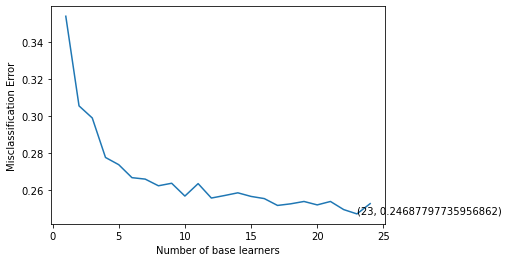

In [115]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [116]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7707194899817851

**Observations**
- K-fold cross validation really helped, we've identified the number of optimal learners to be at 23 and get an accuracy of 77% on test data

### Model evaluation

In [117]:
result = clf.predict(X_test)

In [118]:
accuracy = accuracy_score(result, y_test)
print('Accuracy score: ', accuracy)

Accuracy score:  0.7707194899817851


In [119]:
print(classification_report(result, y_test))

              precision    recall  f1-score   support

    negative       0.94      0.80      0.86      3310
     neutral       0.43      0.62      0.51       613
    positive       0.53      0.78      0.63       469

    accuracy                           0.77      4392
   macro avg       0.63      0.74      0.67      4392
weighted avg       0.82      0.77      0.79      4392



**Observations**
- Again we get very high scores for precision, recall and f1 when identifying negative sentiments
- This time we also get a better recall score when identifying neutral sentiments - 0.62 (precision and f1 are not very good 0.43 and 0.51 respectively), and positive sentiments - 0.78 for recall (0.53 and 0.63 for precision and f1)

### Confusion matrix

<Figure size 432x288 with 0 Axes>

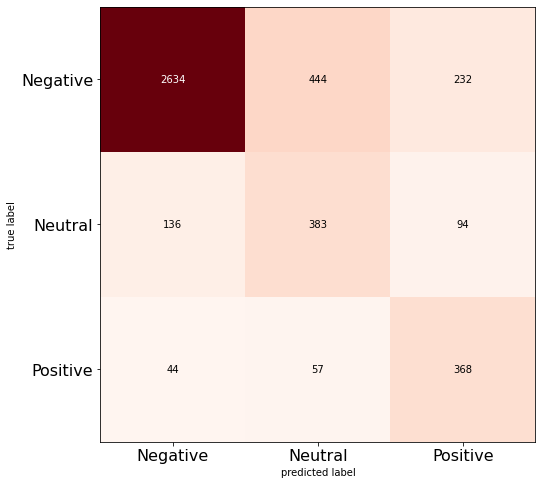

In [120]:
from mlxtend.plotting import plot_confusion_matrix
cm = confusion_matrix(result, y_test)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Reds)
plt.xticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16,color='black')
plt.yticks(range(3), ['Negative', 'Neutral', 'Positive'], fontsize=16)
plt.show()

**Observations**
- We have a higher number of predicted Negative sentiments (2634) that turned out to be true Negative, when compared to using Count Vectorizer
- We also have a higher number of misclassified Negative sentiments (444) that turned out to be neutral
- The number of predicted positive and neutral sentiments that turned out to be true is lower than that of the CountVectorizer, but we also have lower number of misclassified sentiments for neutral and positive

### **Word Cloud of top 40 important features from the tf-idf vectorizer + Random Forest based model**

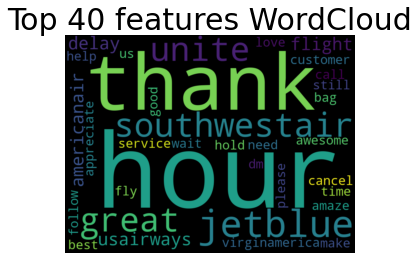

In [121]:
all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

**Observations**
- Almost identical set of words, but I can see words like hold, need, wait customer added in there.

## Summary and Conclusions

- In order to perform Sentiment Analysis/Classification we first need to perform various preprocessing methods to the textual data
- Preprocessing techniques include: stripping html tags, fixing contractions, breaking up sentences into tokens and then performing clean-up on those tokens. Cleaning up the tokens includes: processing non-ascii characters, removing puncuation and special characters (@ sign in our case, for example), removing stopwords, converting to lowercase and finally lemmatizing the arrays of words to bring the words to their stem form
- We then join the arrays of words in each row, so that we have data in text format to perform Vectorization
- Vectorization is a required step in order to perform further classification, since you can't really apply classification on text data. We've used 2 vectorization techniques: CountVectorizer for bag of words and tf-idf vectorization. 
- The difference between the two techniques is that bag of words simply counts the occurence of each word in a document corpus, while tf-idf gives lesser weights to the words that occur frequently throughout the document corpus, bringing less value to the analysis.
- The next step is the already familiar Classification algorithm. I decided to go with Random Forest classifier. The classifier gave fair results in the beginning, and then got better as we used k-fold cross validation to identify the optimal number of learners for the n_estimators hyperparameter. 
- In the end, classification with tf-idf vectorizer slightly outperformed the one with CountVectorizer. But only by very little ~ 1 percent of accuracy, I believe. Overall, the two vectorizers did a good job when used in combination with a random forest classifier. I wonder if XG Boost would have shown better classification results?